input matrix (x_train) (60000, 28, 28)
output matrix (y_train) (60000,)
input matrix (x_test) (10000, 28, 28)
output matrix (y_test) (10000,)


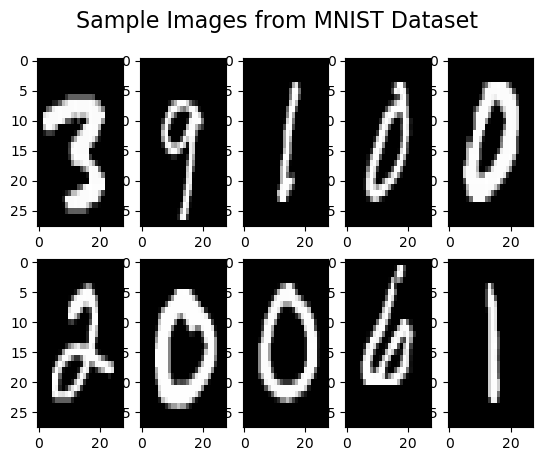

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5975 - loss: 1.5345 - val_accuracy: 0.8952 - val_loss: 0.3581
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8987 - loss: 0.3514 - val_accuracy: 0.9291 - val_loss: 0.2506
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9283 - loss: 0.2449 - val_accuracy: 0.9442 - val_loss: 0.2042
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9438 - loss: 0.2006 - val_accuracy: 0.9511 - val_loss: 0.1751
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9515 - loss: 0.1675 - val_accuracy: 0.9563 - val_loss: 0.1570
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9604 - loss: 0.1430 - val_accuracy: 0.9570 - val_loss: 0.1472
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9632 - loss: 0.1259 - val_accuracy: 0.9632 - val_loss: 0.1310
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9701 - loss: 0.1083 - val_accuracy: 0.9639 - v

In [89]:
#Made by George A.saed#
##modules
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import tensorflow as tf
##remove color and import mnist
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
gray_scale = 255
x_train = x_train.astype('float32') / gray_scale
x_test = x_test.astype('float32') / gray_scale

##test conversion
print("input matrix (x_train)" , x_train.shape )
print("output matrix (y_train)" , y_train.shape )
print("input matrix (x_test)" , x_test.shape )
print("output matrix (y_test)" , y_test.shape )
# Visualizing 10 images from the training data
fig , ax = plt.subplots(2 , 5)
for i in range(2):
 for j in range(5):
     randomp = np.random.randint(0 , 10000)
     ax[i][j].imshow(x_train[randomp].reshape(28 , 28) , aspect ='auto' ,cmap = 'gray' )
     ax[i][j].axis = ('off')
     k += 1
plt.suptitle("Sample Images from MNIST Dataset", fontsize=16)
plt.show()     

##neural network model
model = Sequential([
    ##input layer flattened
    Flatten(input_shape = (28 , 28)),
    
    ##first layer (256)
    Dense(256 , activation = 'relu'),
    
    ##second layer(128)
    Dense(128 , activation = 'relu'),

    ##output layer (10)
    Dense(10 , activation = 'softmax')
])

##Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

##Training the model 
history = model.fit(x_train , y_train , epochs = 20,
                    batch_size = 2000
                    ,validation_split=0.2)





313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<Figure size 1200x500 with 0 Axes>

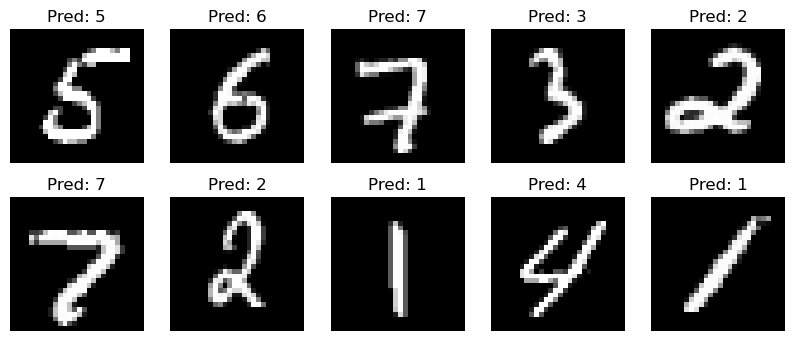

In [83]:
##Evaluating the model
results = model.evaluate(x_test , y_test , verbose = 0)
plt.figure(figsize=(12, 5))

# Predict the labels for the test images
predictions = model.predict(x_test)

# Get the predicted classes (the index of the highest probability)
predicted_labels = np.argmax(predictions, axis=1)

# Number of images to display
num_images_to_display = 10

# Set up the plot
plt.figure(figsize=(10, 4))

# Display the images, true labels, and predicted labels
for i in range(num_images_to_display):
    random = np.random.randint(0 , 10000)
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[random], cmap="gray")  # Display the image in grayscale
    plt.title(f"Pred: {predicted_labels[random]}")
    plt.axis('off')  # Hide axes for better visualization

# Show the plot
plt.show()
